# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


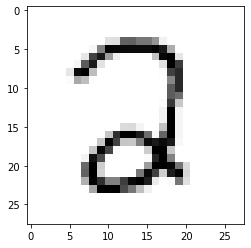

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2495046064409785
train accuracy is: 0.5615923885828743, test accuracy is 0.5806451612903226


Epoch 10 Loss 0.1925774684051615
train accuracy is: 0.8688032048072108, test accuracy is 0.8951612903225806


Epoch 20 Loss 0.095090139455069
train accuracy is: 0.9084460023368386, test accuracy is 0.9254032258064516


Epoch 30 Loss 0.06150904647563375
train accuracy is: 0.9328993490235353, test accuracy is 0.9455645161290323


Epoch 40 Loss 0.048249117042597836
train accuracy is: 0.9465030879652813, test accuracy is 0.9601814516129032


Epoch 50 Loss 0.041333712739395144
train accuracy is: 0.9526790185277917, test accuracy is 0.9672379032258065


Epoch 60 Loss 0.03712509432150271
train accuracy is: 0.957269237189117, test accuracy is 0.9732862903225806


Epoch 70 Loss 0.0342542093570016
train accuracy is: 0.9604406609914873, test accuracy is 0.9727822580645161


Epoch 80 Loss 0.03213713076850262
train accuracy is: 0.9626940410615924, test accuracy is 0.9727822580645161


Epoch 90 Loss 0.030477841746412677
train accuracy is: 0.9646970455683526, test accuracy is 0.9722782258064516


Epoch 100 Loss 0.029143201037320352
train accuracy is: 0.9658654648639626, test accuracy is 0.9722782258064516


Epoch 110 Loss 0.02801281941575668
train accuracy is: 0.9669504256384577, test accuracy is 0.9722782258064516


Epoch 120 Loss 0.027040485904638503
train accuracy is: 0.9678684693707228, test accuracy is 0.9732862903225806


Epoch 130 Loss 0.026203410615851807
train accuracy is: 0.9691203471874479, test accuracy is 0.9712701612903226


Epoch 140 Loss 0.02545642530086236
train accuracy is: 0.970372225004173, test accuracy is 0.9717741935483871


Epoch 150 Loss 0.024791864884343328
train accuracy is: 0.9711233516942079, test accuracy is 0.9722782258064516


Epoch 160 Loss 0.024185990711881346
train accuracy is: 0.9722083124687031, test accuracy is 0.9722782258064516


Epoch 170 Loss 0.023626694397987993
train accuracy is: 0.972458688032048, test accuracy is 0.9722782258064516


Epoch 180 Loss 0.023102906810034143
train accuracy is: 0.9735436488065431, test accuracy is 0.9727822580645161


Epoch 190 Loss 0.02262466461600391
train accuracy is: 0.9743782340176932, test accuracy is 0.9727822580645161


Epoch 200 Loss 0.022165346824786825
train accuracy is: 0.9746286095810383, test accuracy is 0.9732862903225806


Epoch 210 Loss 0.021735324975931187
train accuracy is: 0.9751293607077283, test accuracy is 0.9732862903225806


Epoch 220 Loss 0.021323195088659763
train accuracy is: 0.9757135703555333, test accuracy is 0.9732862903225806


Epoch 230 Loss 0.020935520445035022
train accuracy is: 0.9761308629611083, test accuracy is 0.9732862903225806


Epoch 240 Loss 0.020564694531716953
train accuracy is: 0.9767985311300283, test accuracy is 0.9742943548387096


0.0033990159170219497

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.25510356436654663
train accuracy is: 0.6227674845601736, test accuracy is 0.6345766129032258


Epoch 10 Loss 0.10234872226014952
train accuracy is: 0.9176264396594892, test accuracy is 0.9269153225806451


Epoch 20 Loss 0.0783369880421102
train accuracy is: 0.9318143882490403, test accuracy is 0.9420362903225806


Epoch 30 Loss 0.06750486617452925
train accuracy is: 0.9398264062760808, test accuracy is 0.9480846774193549


Epoch 40 Loss 0.06102478146973716
train accuracy is: 0.943832415289601, test accuracy is 0.9516129032258065


Epoch 50 Loss 0.05661417399303248
train accuracy is: 0.9458354197963612, test accuracy is 0.953125


Epoch 60 Loss 0.05337135082838273
train accuracy is: 0.9482557169086964, test accuracy is 0.9536290322580645


Epoch 70 Loss 0.050864298310475
train accuracy is: 0.9495910532465365, test accuracy is 0.954133064516129


Epoch 80 Loss 0.04885217740134882
train accuracy is: 0.9507594725421465, test accuracy is 0.9561491935483871


Epoch 90 Loss 0.04719326499584634
train accuracy is: 0.9526790185277917, test accuracy is 0.9571572580645161


Epoch 100 Loss 0.04579431127771202
train accuracy is: 0.9537639793022867, test accuracy is 0.9581653225806451


Epoch 110 Loss 0.044594000021846075
train accuracy is: 0.9544316474712068, test accuracy is 0.9606854838709677


Epoch 120 Loss 0.04354809460609338
train accuracy is: 0.9555166082457018, test accuracy is 0.9606854838709677


Epoch 130 Loss 0.042628413210168296
train accuracy is: 0.956100817893507, test accuracy is 0.9601814516129032


Epoch 140 Loss 0.04180832924748064
train accuracy is: 0.957269237189117, test accuracy is 0.9601814516129032


Epoch 150 Loss 0.04107309220998759
train accuracy is: 0.9579369053580371, test accuracy is 0.9601814516129032


Epoch 160 Loss 0.040408057286301674
train accuracy is: 0.9582707394424971, test accuracy is 0.9601814516129032


Epoch 170 Loss 0.039802822060661644
train accuracy is: 0.9591053246536472, test accuracy is 0.9606854838709677


Epoch 180 Loss 0.03924946824528416
train accuracy is: 0.9596895343014522, test accuracy is 0.9611895161290323


Epoch 190 Loss 0.0387387359056222
train accuracy is: 0.9601068269070272, test accuracy is 0.9616935483870968


Epoch 200 Loss 0.03826690570153349
train accuracy is: 0.9601902854281422, test accuracy is 0.9621975806451613


Epoch 210 Loss 0.03782983992380536
train accuracy is: 0.9603572024703723, test accuracy is 0.9627016129032258


Epoch 220 Loss 0.03742210672882914
train accuracy is: 0.9608579535970623, test accuracy is 0.9632056451612904


Epoch 230 Loss 0.037040165253571705
train accuracy is: 0.9609414121181773, test accuracy is 0.9632056451612904


Epoch 240 Loss 0.03668297663498821
train accuracy is: 0.9613587047237523, test accuracy is 0.9632056451612904


0.032902312577669304

### Comparing results of NN and LR

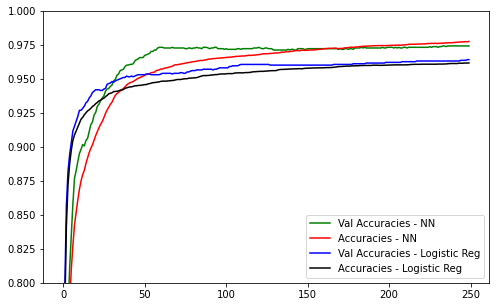

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

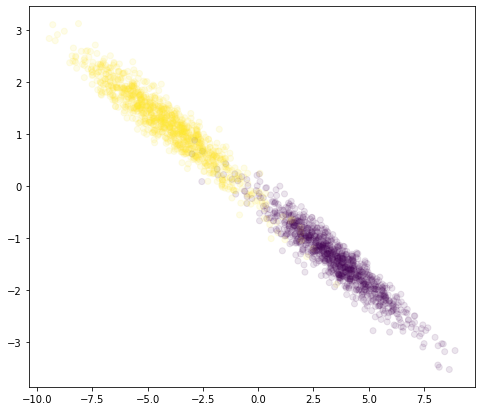

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

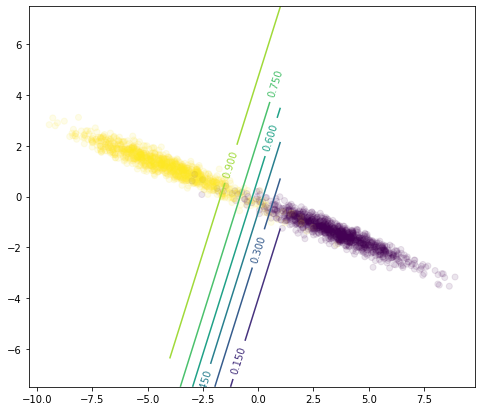

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );